### Instructions

1) Please push the .ipynb and .pdf to Github Classroom prior to the deadline, .py file is optional (not needed).<br>
2) Please include your Name and UNI below.

### Name: Arjun Bhan
### UNI: AB5666

##Setup

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pprint
pp = pprint.PrettyPrinter(indent=4)
import warnings
warnings.filterwarnings("ignore")

# Part 1: Neural Network from the scratch
For this part, you are not allowed to use any library other than numpy.

In this part, you will will implement the forward pass and backward pass (i.e. the derivates of each
parameter wrt to the loss) with the network image uploaded.

The weight matrix for the hidden layer is W1 and has bias b1.

The weight matrix for the ouput layer is W2 and has bias b2.

Activatation function is sigmoid for both hidden and output layer

Loss function is the MSE loss

Refer to the below dictionary for dimensions for each matrix


In [4]:
np.random.seed(0) # don't change this
weights = {
'W1': np.random.randn(3, 2),
'b1': np.zeros(3),
'W2': np.random.randn(3),
'b2': 0,
}
X = np.random.rand(1000,2)
Y = np.random.randint(low=0, high=2, size=(1000,))

In [5]:
#Sigmoid Function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [6]:
#Implement the forward pass
def forward_propagation(X, weights):
    # Z1 -> output of the hidden layer before applying activation
    # H -> output of the  hidden layer after applying activation
    # Z2 -> output of the final layer before applying activation
    # Y -> output of the final layer after applying activation

    Z1 = np.dot(X, weights['W1'].T)  + weights['b1']
    H = sigmoid(Z1)

    Z2 = np.dot(H, weights['W2'])  + weights['b2']
    Y = sigmoid(Z2)

    return Y, Z2, H, Z1

In [7]:
# Implement the backward pass
# Y_T are the ground truth labels
def back_propagation(X, Y_T, weights):
    N_points = X.shape[0]

    # forward propagation
    Y, Z2, H, Z1 = forward_propagation(X, weights)
    L = (1/(2*N_points)) * np.sum(np.square(Y - Y_T))

    # back propagation
    dLdY = 1/N_points * (Y - Y_T)
    dLdZ2 = np.multiply(dLdY, (sigmoid(Z2)*(1-sigmoid(Z2))))
    dLdW2 = np.dot(H.T, dLdZ2)

    ones = np.ones((1000))
    dLdb2 = np.dot(ones.T, dLdZ2)
    dLdH = np.dot(dLdZ2.reshape(-1,1), weights['W2'].reshape(-1,1).T)

    dLdZ1 = np.multiply(dLdH, (sigmoid(Z1)*(1-sigmoid(Z1))))
    dLdW1 = np.dot(dLdZ1.T, X)
    dLdb1 =np.dot(ones.T, dLdZ1)

    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }

    return gradients, L

In [8]:
gradients, L = back_propagation(X, Y, weights)
print(L)

0.1332476222330792


In [9]:
pp.pprint(gradients)

{   'W1': array([[ 0.00244596,  0.00262019],
       [-0.00030765, -0.00024188],
       [-0.00034768, -0.000372  ]]),
    'W2': array([0.02216011, 0.02433097, 0.01797174]),
    'b1': array([ 0.00492577, -0.00058023, -0.00065977]),
    'b2': 0.029249230265318685}


Your answers should be close to L = 0.133 and 'b1': array([ 0.00492, -0.000581, -0.00066]). You will be graded based on your implementation and outputs for L, W1, W2 b1, and b2

# Part 2: Neural network to classify images: CIFAR-10

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). The train/test split is 50k/10k.

In [33]:
from tensorflow.keras.datasets import cifar10
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()

LABELS = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

### 2.1 Plot 50 samples from each class/label from train set on a 10*5 subplot


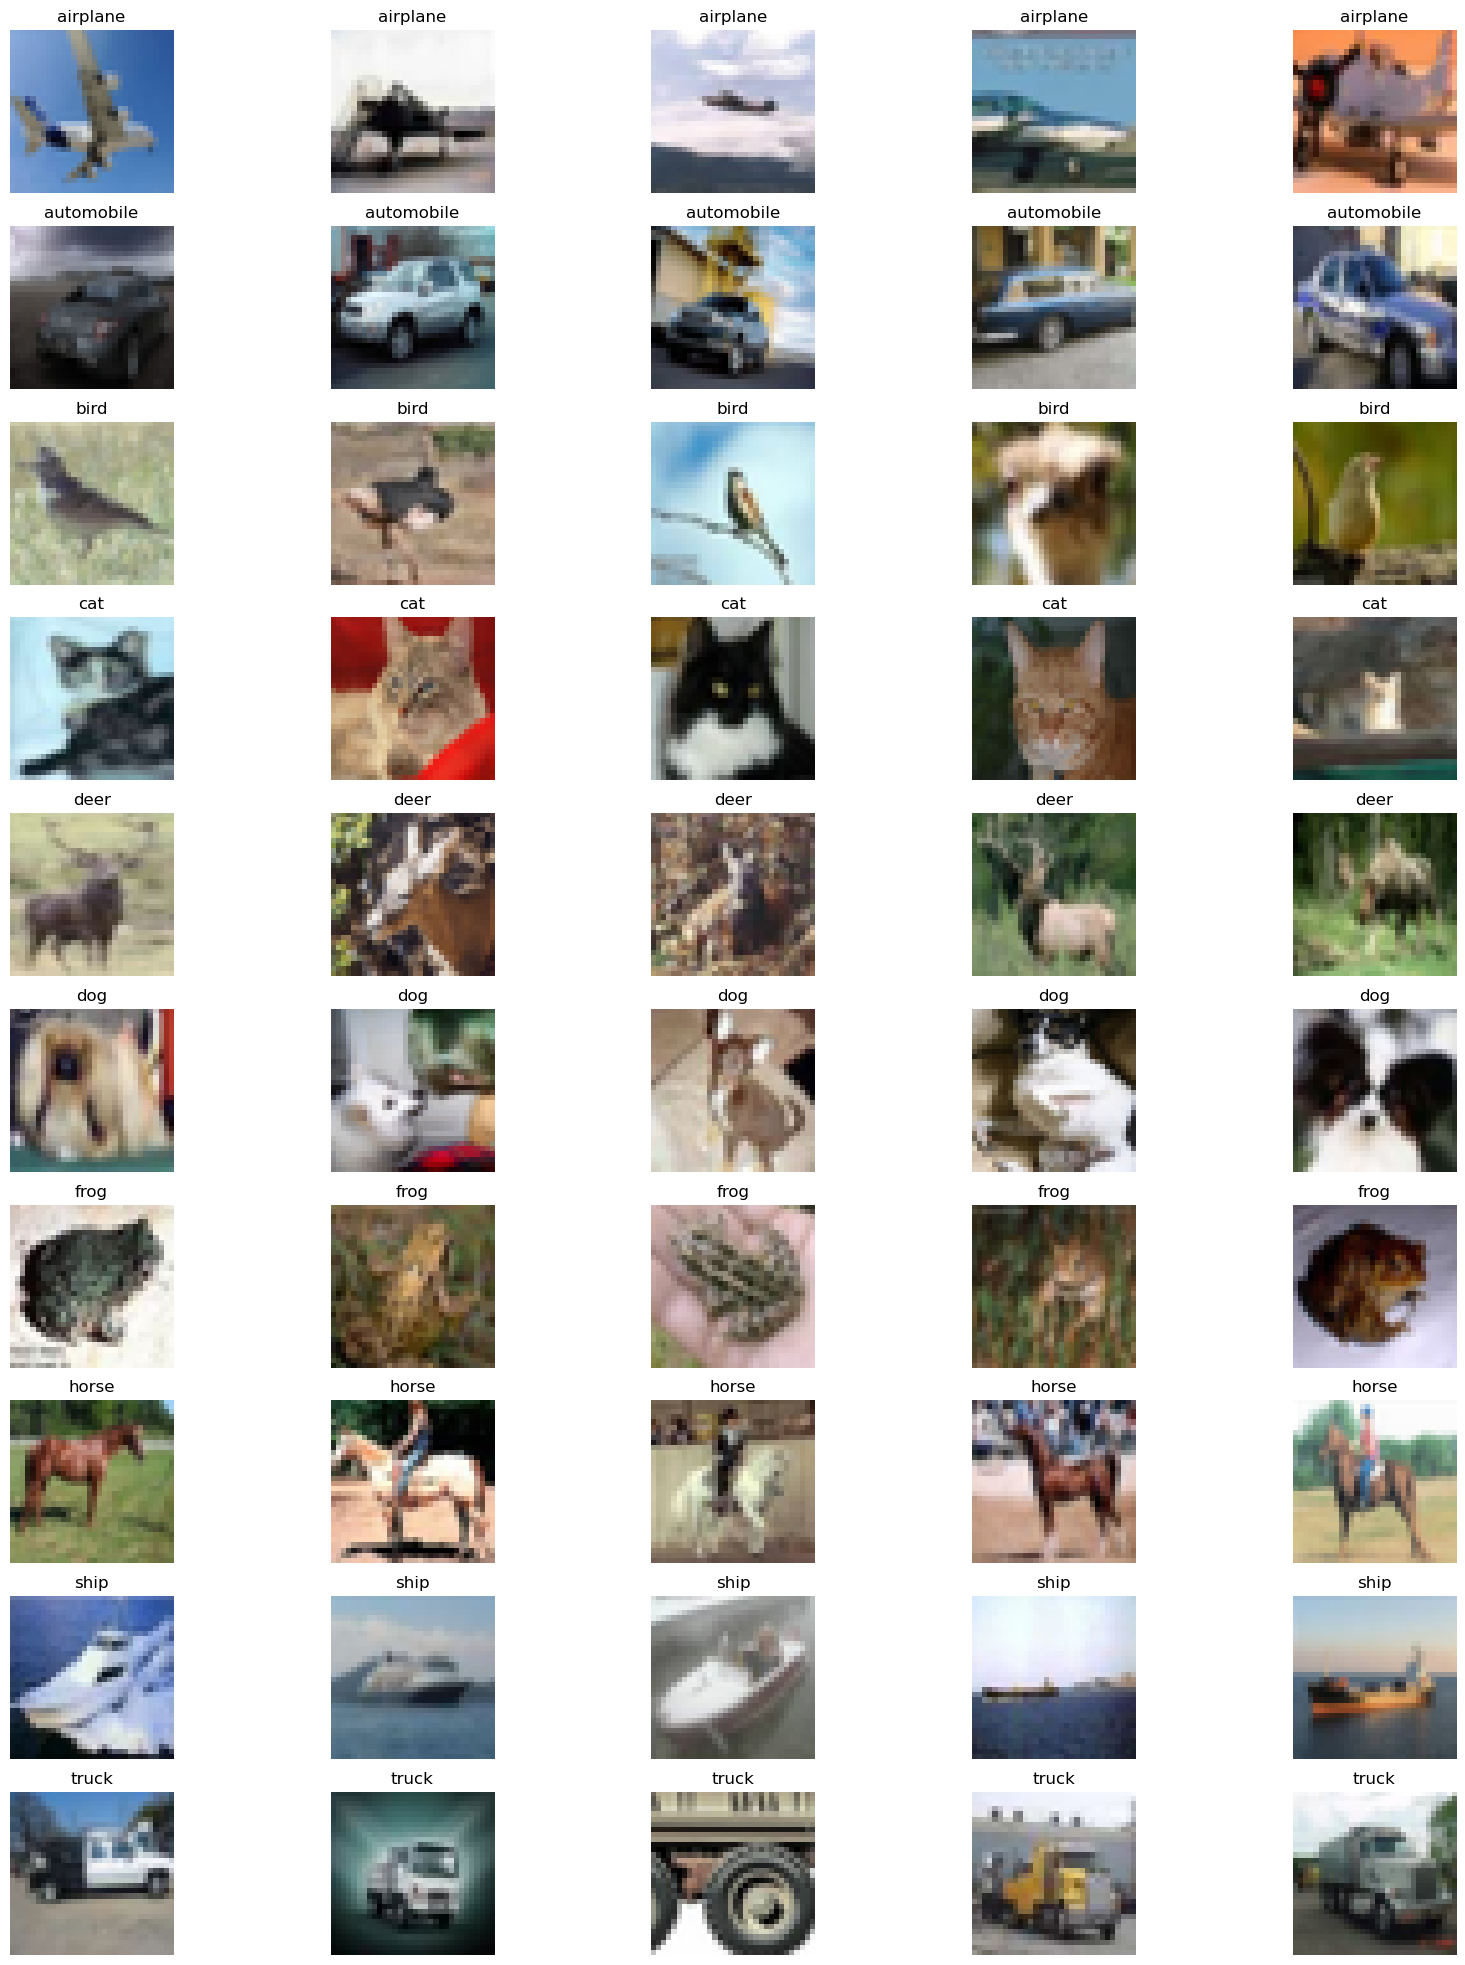

In [11]:
#Your code here
fig, ax = plt.subplots(nrows = 10, ncols = 5, figsize=(20,25))
for i in range(10):
  label_index = np.where(i == y_dev)[0]
  sample_index = np.random.choice(label_index, 5, replace = False )
  for j in range(5):
    ax[i, j].imshow(x_dev[sample_index[j]])
    ax[i, j].axis("off")
    ax[i, j].set_title(LABELS[i])
plt.show()


###2.2 Preparing the dataset for NN

1) Print the shapes -  𝑥𝑑𝑒𝑣, 𝑦𝑑𝑒𝑣, 𝑥𝑡𝑒𝑠𝑡, 𝑦𝑡𝑒𝑠𝑡

2) Flatten the images into one-dimensional vectors and again print the shapes of  𝑥𝑑𝑒𝑣, 𝑥𝑡𝑒𝑠𝑡

3) Standardize the development and test sets.

4) Train-test split your development set into train and validation sets (8:2 ratio).

In [34]:
print("x_dev shape:", x_dev.shape)
print("y_dev shape:", y_dev.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_dev shape: (50000, 32, 32, 3)
y_dev shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [35]:
x_dev_new = x_dev/255
x_test_new = x_test/255

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val= train_test_split(x_dev_new, y_dev, test_size = .2, random_state = 42)

### 2.3 Build the feed forward network with the below specifications

First layer size = 128

hidden layer size = 64

last layer size = Figure this out from the data!

In [53]:
from keras.src.callbacks import optimizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

#Your code here
model = Sequential([
    Dense(128, activation = 'relu', input_shape = (None, 32, 32, 3)),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [47]:
X_train.shape

(40000, 32, 32, 3)

In [42]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential([
  Conv2D(filters = 6, kernel_size = (5,5), strides = (1, 1),  activation = 'relu', input_shape = (None, 32, 32, 3)),
  MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
  Conv2D(filters = 16, kernel_size = (5,5), strides = (1, 1), activation = 'relu'),
  MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
  Conv2D(filters = 120, kernel_size = (5,5), strides = (1, 1), activation = 'relu'),
  Flatten(),
  Dense(units = 84, activation = 'relu'),
  Dense(units = 10, activation = 'softmax')
])

###2.4 Print out the model summary. Mention the number of parameters for each layer.

In [54]:
#Your code here
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, None, 32, 32, 12   512       
                             8)                                  
                                                                 
 dense_21 (Dense)            (None, None, 32, 32, 64   8256      
                             )                                   
                                                                 
 dense_22 (Dense)            (None, None, 32, 32, 10   650       
                             )                                   
                                                                 
Total params: 9418 (36.79 KB)
Trainable params: 9418 (36.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###2.5 Do you think the number of parameters is dependent on the image height and width?

In [55]:
""" Your comments here
The number of parameters in the first layer was dependent on 
the image height and width. We get the first layer by multiply the the 
height * width * color channels. This would be 32* 32 * 3 which gives us 3072. 
This value is used to determine the number of parameters which is determined 
by input features * neruons + bias which is 3072 * 128 + 128 that equals 393344. 
"""

' Your comments here\nThe number of parameters in the first layer was dependent on \nthe image height and width. We get the first layer by multiply the the \nheight * width * color channels. This would be 32* 32 * 3 which gives us 3072. \nThis value is used to determine the number of parameters which is determined \nby input features * neruons + bias which is 3072 * 128 + 128 that equals 393344. \n'

**Printing out your model's output on first train sample. This will confirm if your dimensions are correctly set up. The sum of this output equal to 1 upto two decimal places?**

In [56]:
#modify name of X_train based on your requirement

model.compile()
output = model.predict(X_train[0])

print("Output: {:.2f}".format(sum(output[0])))

ValueError: in user code:

    File "C:\Users\arjun\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\arjun\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\arjun\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\arjun\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "C:\Users\arjun\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\arjun\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, None, 32, 32, 3), found shape=(32, 32, 3)


###2.6 Using the right metric and  the right loss function, with Adam as the optimizer, train your model for 20 epochs.

In [19]:
#Your code here
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model_train = model.fit(X_train, y_train, epochs = 20, validation_data= (X_val, y_val))

Epoch 1/20


1250/1250 [==============================] - 5s 3ms/step - loss: 1.8874 - accuracy: 0.3162 - val_loss: 1.7655 - val_accuracy: 0.3575
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7160 - accuracy: 0.3805 - val_loss: 1.6884 - val_accuracy: 0.3867
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6511 - accuracy: 0.4091 - val_loss: 1.6635 - val_accuracy: 0.4094
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6081 - accuracy: 0.4238 - val_loss: 1.6192 - val_accuracy: 0.4136
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5729 - accuracy: 0.4381 - val_loss: 1.5989 - val_accuracy: 0.4196
Epoch 6/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5427 - accuracy: 0.4473 - val_loss: 1.6059 - val_accuracy: 0.4236
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5247 - accuracy: 0.4549 - val_loss: 1.5528 - val_accurac

###2.7 Plot the training curves described below

###2.7.1 Display the train vs validation loss over each epoch


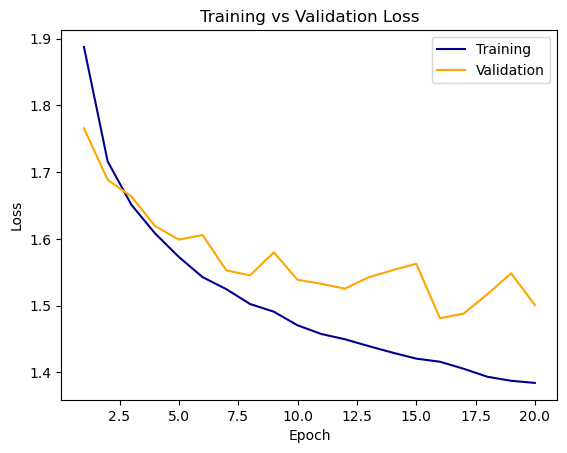

In [28]:
#Your code here
trainLoss= model_train.history['loss']
valLoss = model_train.history['val_loss']
epochs = range(1, 21)
plt.title('Training vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(epochs, trainLoss, label = 'Training', color = 'darkblue')
plt.plot(epochs, valLoss, label = 'Validation', color = 'orange')
plt.legend()
plt.show()


###2.7.2 Display the train vs validation accuracy over each epoch

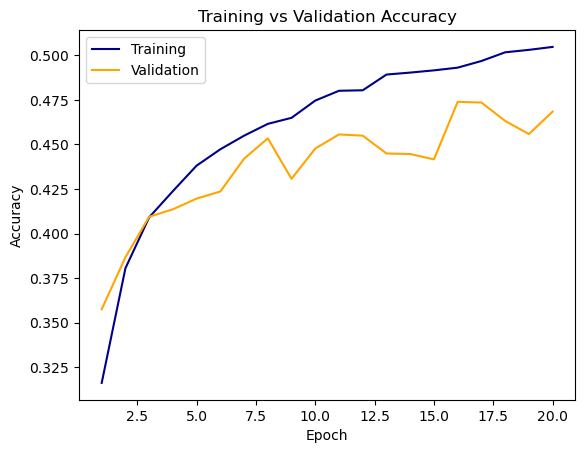

In [29]:
#Your code here
trainAccuracy= model_train.history['accuracy']
valAccuracy = model_train.history['val_accuracy']
epochs = range(1, 21)
plt.title('Training vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(epochs, trainAccuracy, label = 'Training', color = 'darkblue')
plt.plot(epochs, valAccuracy, label = 'Validation', color = 'orange')
plt.legend()
plt.show()

### 2.8 Finally, report the metric chosen on test set

In [22]:
#Your code here
loss, accur = model.evaluate(x_test_new, y_test)
print('Loss', loss)
print('Accuracy', accur)

313/313 [==============================] - 1s 2ms/step - loss: 1.4828 - accuracy: 0.4762
Loss 1.4827879667282104
Accuracy 0.47620001435279846


### 2.9 Plot the first 50 samples of test dataset on a 10*5 subplot and this time label the images with both the ground truth (GT) and predicted class (P). (Make sure you predict the class with the improved model)

In [23]:
predictions = model.predict(x_test_new)

313/313 [==============================] - 1s 2ms/step


In [24]:
predictions

array([[5.06254956e-02, 2.60059446e-01, 1.40417889e-02, ...,
        7.11478665e-03, 5.19002862e-02, 9.00392234e-03],
       [2.08439510e-02, 5.78363359e-01, 2.45913165e-04, ...,
        1.14664996e-04, 9.34033990e-02, 3.06509823e-01],
       [1.69842571e-01, 4.50887620e-01, 5.20425383e-03, ...,
        9.29115340e-04, 2.49892369e-01, 1.17782533e-01],
       ...,
       [1.89238123e-03, 2.68367206e-04, 1.89536005e-01, ...,
        2.05232669e-02, 1.25907380e-02, 7.36187038e-04],
       [2.77237371e-02, 2.32379395e-03, 3.98221523e-01, ...,
        1.15610369e-01, 3.20565188e-03, 1.12653419e-03],
       [8.03150162e-02, 1.37677118e-02, 7.32770115e-02, ...,
        5.04586577e-01, 1.46019831e-02, 2.84828674e-02]], dtype=float32)

In [25]:
np.argmax(predictions[0])

3

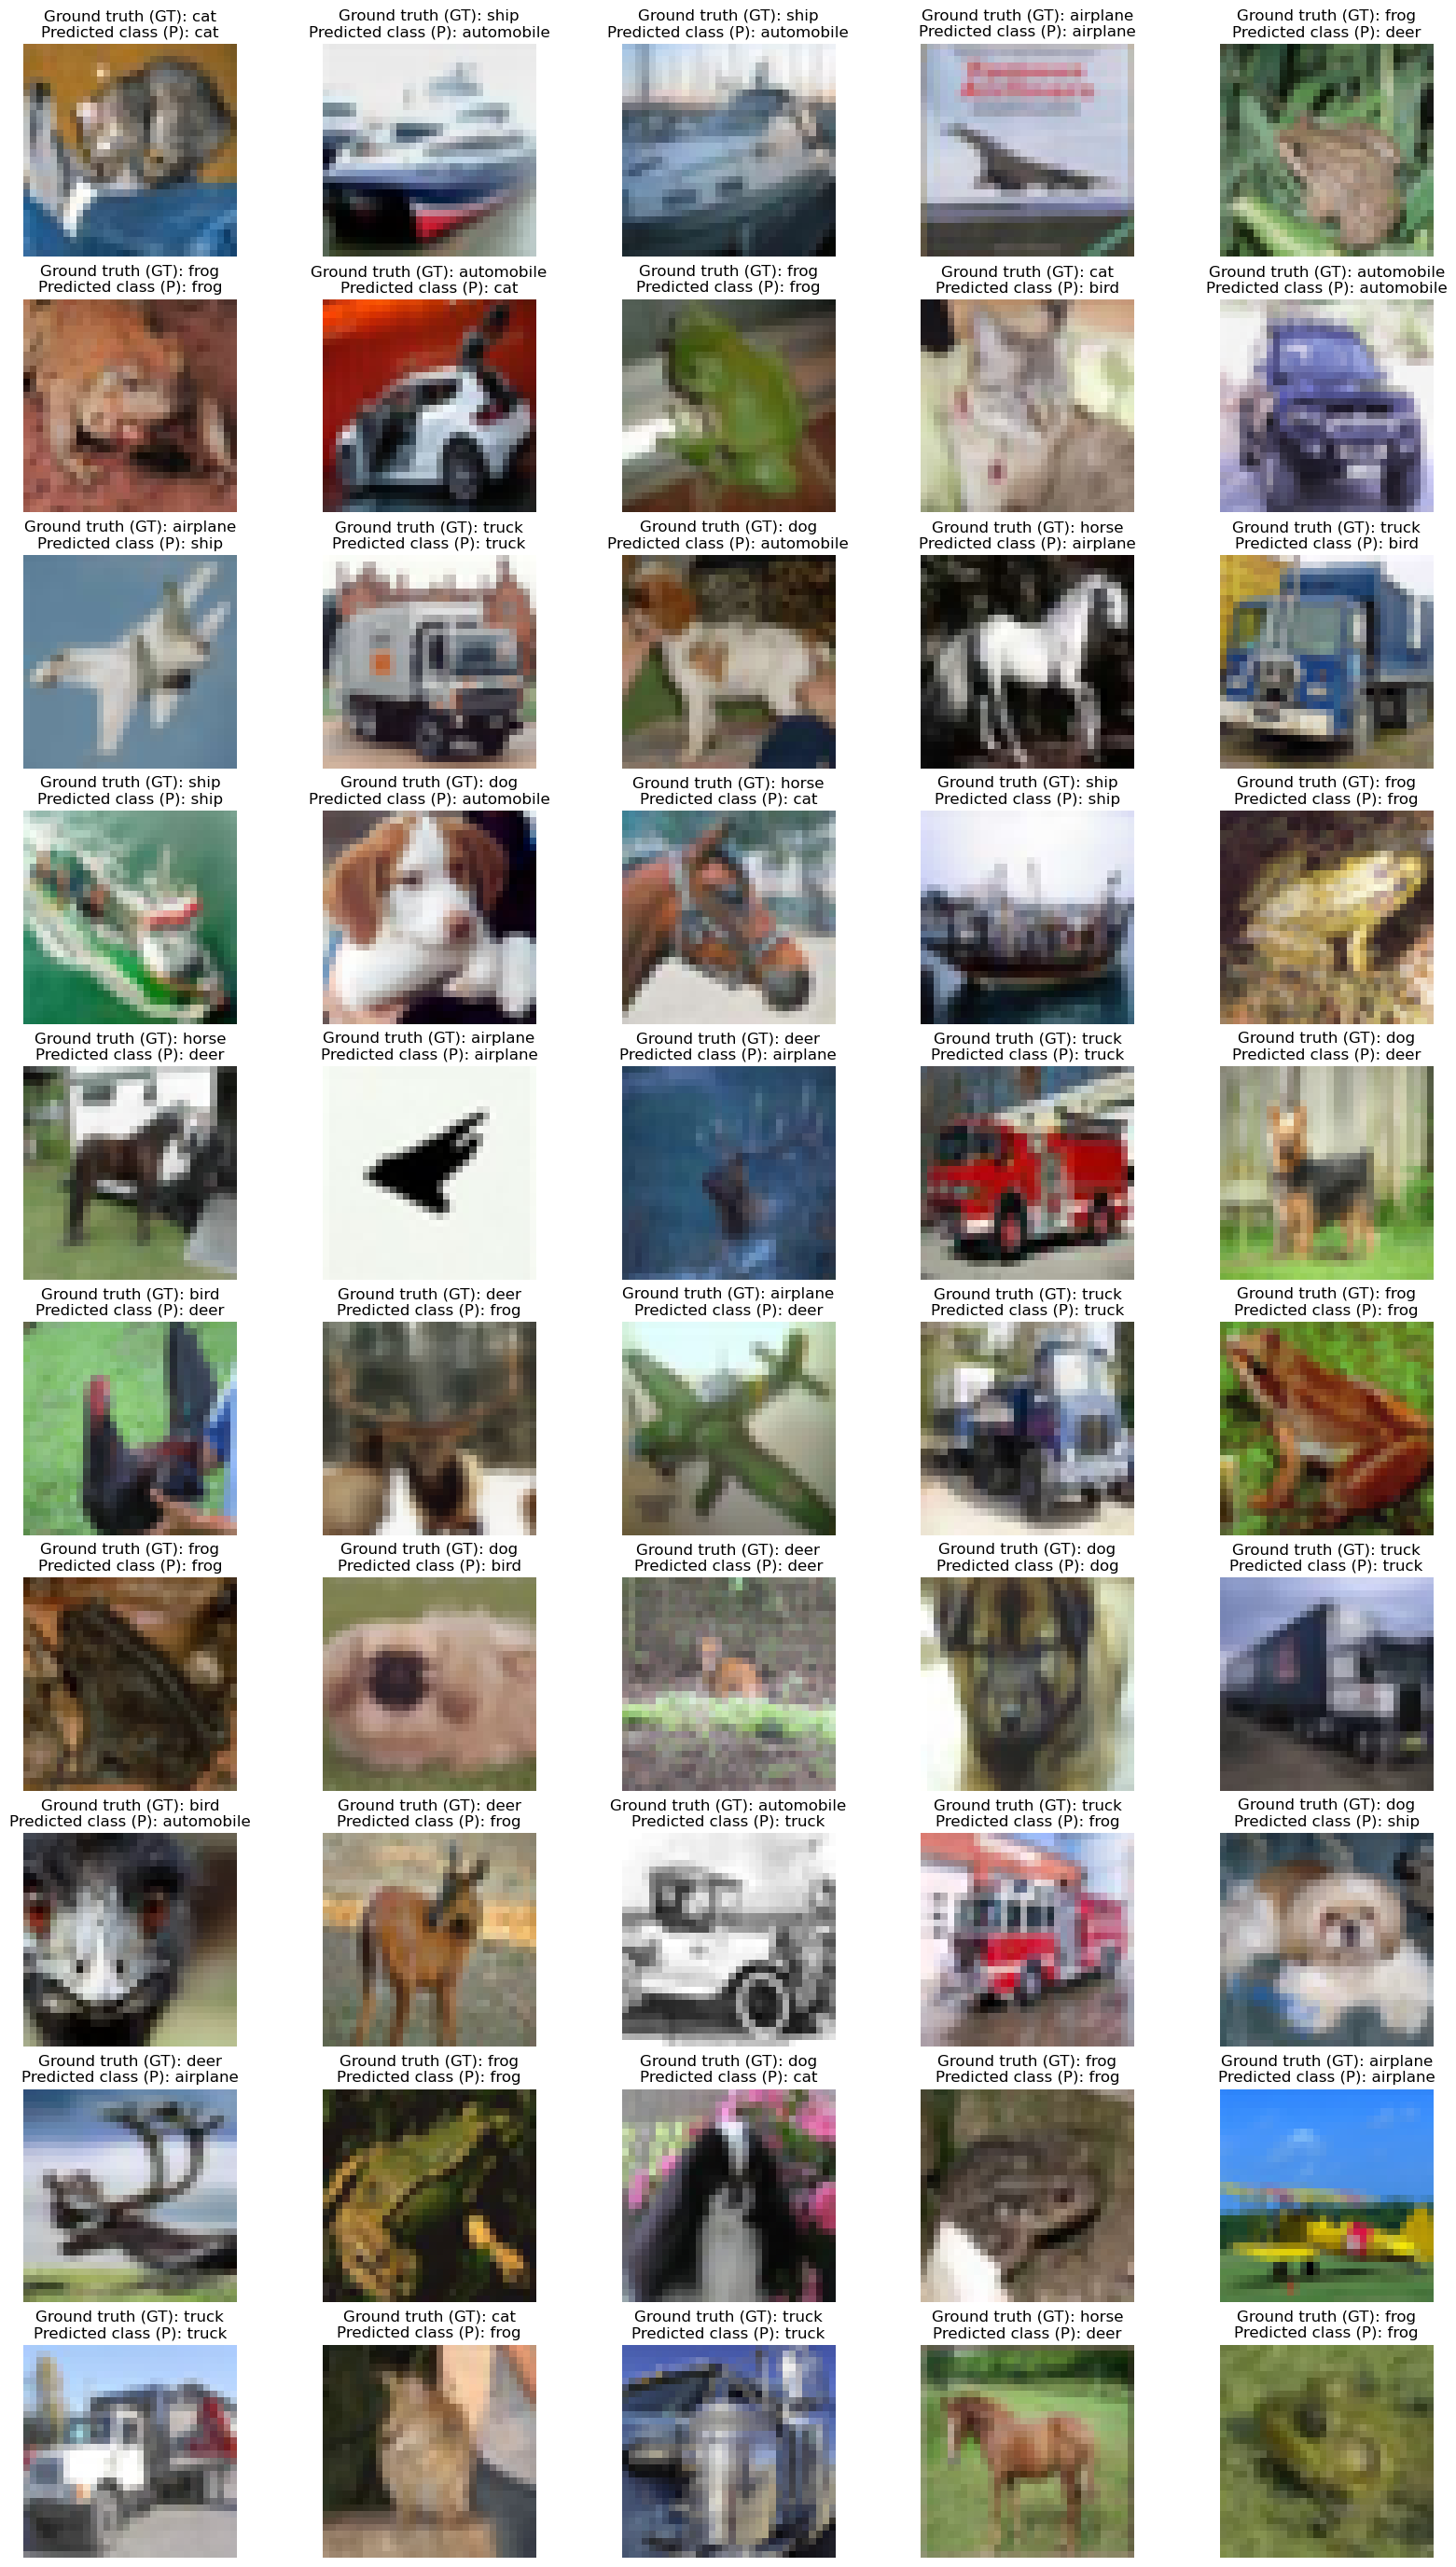

In [26]:
#Your code here
fig, ax = plt.subplots(nrows = 10, ncols = 5, figsize=(20,35))
count = 0
for i in range(10):
    for j in range(5):
        ax[i, j].imshow(x_test[count])
        ax[i, j].axis("off")
        ax[i, j].set_title('Ground truth (GT): ' + LABELS[y_test[count][0]] + '\n' +'Predicted class (P): ' + LABELS[np.argmax(predictions[count])])
        count += 1 
plt.show()